In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

data = np.genfromtxt('Notch_-10dB.dat', delimiter=',', skip_header=3)

In [2]:
freq = data[:, 0]
real = data[:, 1]
imag = data[:, 2]

In [3]:
mag = np.sqrt(real**2 + imag**2)
mag_dB = 20 * np.log10(mag)
peaks, _ = find_peaks(-mag_dB, height=-30, distance=15000)

In [4]:
sim_data = pd.read_csv('notch4.csv', skiprows=8)
sim_freq = sim_data['Frequency (GHz)'] * 1e9  
sim_real = sim_data['RE[S21]']
sim_imag = sim_data['IM[S21]']
sim_mag = np.sqrt(sim_real**2 + sim_imag**2)
sim_mag_dB = 20 * np.log10(sim_mag)

peks, _ = find_peaks(-sim_mag_dB, height=-20, distance=300)


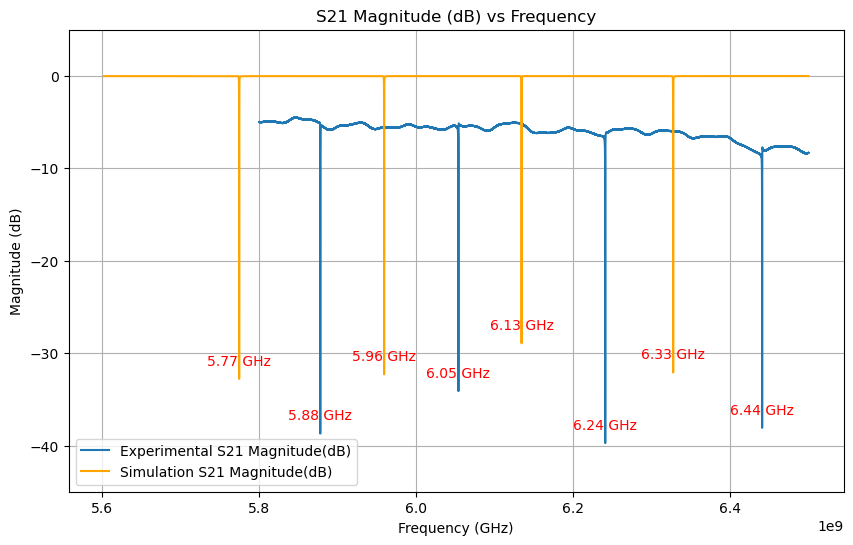

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(freq, mag_dB, label='Experimental S21 Magnitude(dB)')
plt.plot(sim_freq, sim_mag_dB, label='Simulation S21 Magnitude(dB)', color='orange')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.title('S21 Magnitude (dB) vs Frequency')
for peak in peaks:
    plt.annotate(f'{freq[peak]/1e9:.2f} GHz', 
                 (freq[peak], mag_dB[peak]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')
for pek in peks:
    plt.annotate(f'{sim_freq[pek]/1e9:.2f} GHz', 
                 (sim_freq[pek], sim_mag_dB[pek]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.ylim(-45, 5)
plt.grid(True)
plt.legend()
plt.show()

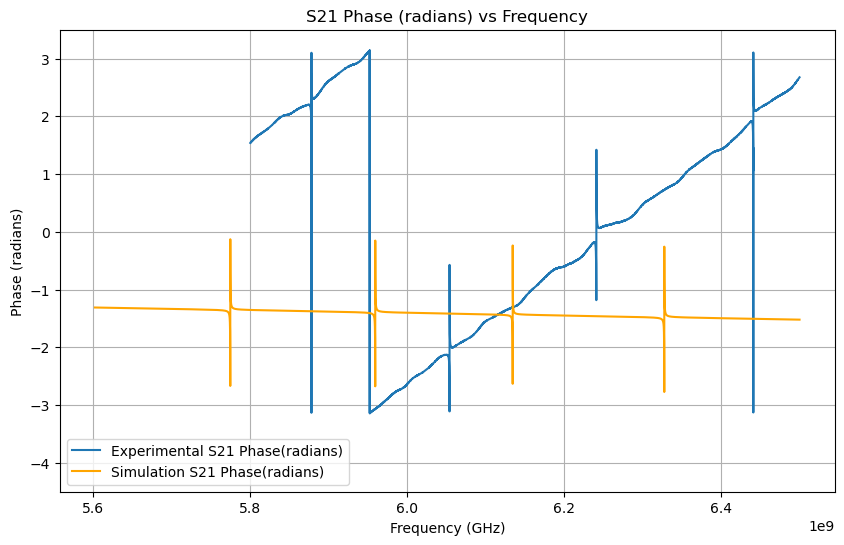

In [6]:
sim_phase_radians = np.arctan2(sim_imag, sim_real)
phase_radians = np.arctan2(imag, real)
plt.figure(figsize=(10, 6))
plt.plot(freq, phase_radians, label='Experimental S21 Phase(radians)')
plt.plot(sim_freq, sim_phase_radians, label='Simulation S21 Phase(radians)', color='orange')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Phase (radians)')
plt.title('S21 Phase (radians) vs Frequency')
plt.ylim(-4.5, 3.5)
plt.grid(True)
plt.legend()
plt.show()